In [3]:
pip install pandas_market_calendars

     |████████████████████████████████| 61kB 181kB/s eta 0:00:01
     |████████████████████████████████| 112kB 303kB/s eta 0:00:01
  Created wheel for trading-calendars: filename=trading_calendars-2.0.0-cp37-none-any.whl size=135649 sha256=6ada312551b64f19bb5b05b760f731e272ccfdaaded330673a4d1a91ab44e851
  Stored in directory: /Users/guillaume/Library/Caches/pip/wheels/6e/fb/89/d71a90b9dd2c51fad1b5f6d240deb0d5051e80402f9fc3a6b9
Successfully built trading-calendars
Note: you may need to restart the kernel to use updated packages.


In [152]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline
import pandas_datareader.data as web 
import datetime
import pandas_market_calendars as mcal
import matplotlib.dates as mdates
import scipy.stats as scs
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf as sm

import os 
CWD = os.getcwd()
path_fig = os.path.join(CWD,'images')
path_table=os.path.join(CWD,'table')
if not os.path.exists(path_fig): os.makedirs(path_fig)
if not os.path.exists(path_table):os.makedirs(path_table)

In [153]:
start = datetime.datetime(1993, 6, 1) #y,m,d
end = datetime.datetime(2020,4,10)

In [154]:
swatch=web.DataReader('UHR.SW', 'yahoo', start, end)
nestle= web.DataReader('NESN.SW', 'yahoo', start, end)
smi= web.DataReader('^SSMI','yahoo',start,end)

In [155]:
swatch_close=swatch['Adj Close']
nestle_close=nestle['Adj Close']
smi_close=smi['Adj Close']

In [156]:
d={'Swatch_close':swatch_close,'Nestle_close':nestle_close,'Smi_close':smi_close}
df = pd.DataFrame(data=d)

In [157]:
df = df.dropna()
df.head()

,Swatch_close,Nestle_close,Smi_close
Date,,,
1998-07-17,73.005150,4.082260,8288.200195
1998-07-20,73.005150,4.123868,8400.799805
1998-07-21,72.330849,4.158342,8412.000000
1998-07-22,70.551277,4.084637,8340.700195
1998-07-23,68.895172,3.937229,8229.200195


In [158]:
df.index
nestle_close = df['Nestle_close']
swatch_close = df['Swatch_close']
smi_close = df['Smi_close']

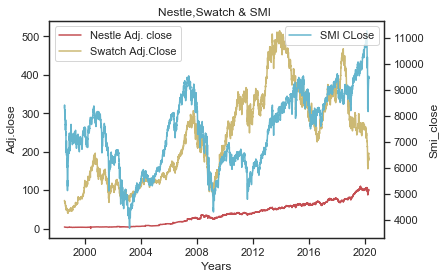

In [159]:
###in 2 axis en pct
##plot in seaborn with 2 axis 
sns.lineplot(df.index,nestle_close, label='Nestle Adj. close',c='r')
sns.lineplot(df.index,swatch_close,label='Swatch Adj.Close',c='y')
plt.title('Nestle,Swatch & SMI ')
plt.xlabel('Years')
plt.ylabel('Adj.close')
plt.legend()


ax2 = plt.twinx()
sns.lineplot(df.index,smi_close, ax=ax2,label= 'SMI CLose', c='c')
ax2.legend(loc="upper right")

plt.savefig(os.path.join(path_fig,'SMI_SWATCH,_NESTLE.png'));

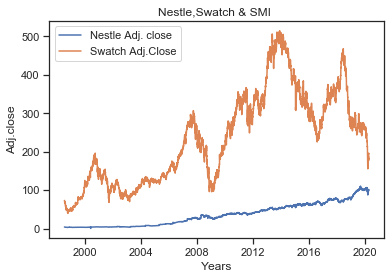

In [160]:
#stock plot
sns.lineplot(df.index,nestle_close, label='Nestle Adj. close')
sns.lineplot(df.index,swatch_close,label='Swatch Adj.Close')
plt.title('Nestle,Swatch & SMI ')
plt.xlabel('Years')
plt.ylabel('Adj.close')
plt.legend()
plt.savefig(os.path.join(path_fig,'SWATCH,_NESTLE.png'))

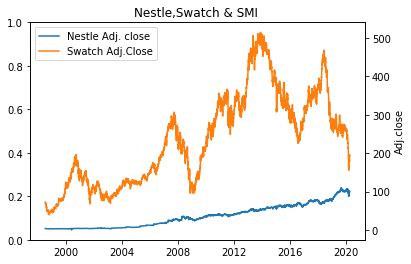

In [38]:
#stock plot 2 axes
ax2=plt.twinx()

sns.lineplot(df.index,nestle_close, label='Nestle Adj. close')
sns.lineplot(df.index,swatch_close,label='Swatch Adj.Close',ax=ax2)

plt.title('Nestle,Swatch & SMI ')
plt.xlabel('Years')
plt.ylabel('Adj.close')
plt.legend()
plt.savefig(os.path.join(path_fig,'2ax_SWATCH,_NESTLE.png'))

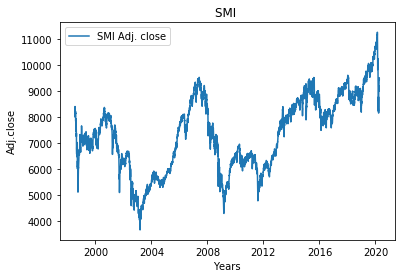

In [39]:
#smi plot
sns.lineplot(df.index,smi_close, label='SMI Adj. close')
plt.title('SMI ')
plt.xlabel('Years')
plt.ylabel('Adj.close')
plt.legend()
plt.savefig(os.path.join(path_fig,'SMI.png'))

In [41]:
sns.set(style="ticks")
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

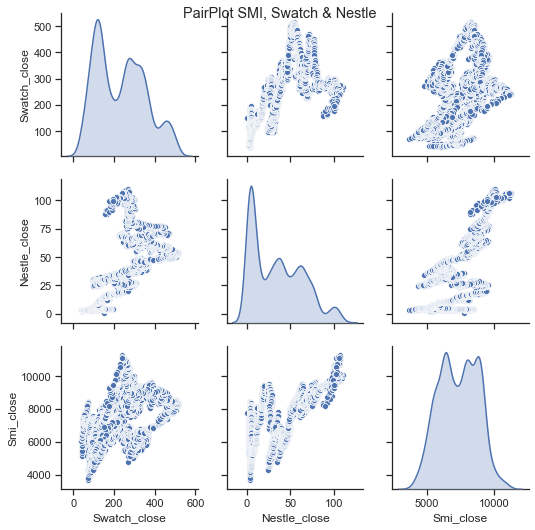

In [45]:
pairplot=sns.pairplot(df, diag_kind=('kde'))
pairplot.fig.suptitle("PairPlot SMI, Swatch & Nestle")
plt.savefig(os.path.join(path_fig,'Pairplot.png'))

In [162]:
#Returns
df['Return SMI']=df['Smi_close'].pct_change()
df['Return Swatch']=df['Swatch_close'].pct_change()
df['Return Nestle']=df['Nestle_close'].pct_change()

#log return
df['log Return SMI'] = np.log(df['Smi_close']/df['Smi_close'].shift(1))
df['log return Swatch']=np.log(df['Swatch_close'] / df['Swatch_close'].shift(1))
df['log Return Nestle'] = np.log(df['Nestle_close']/df['Nestle_close'].shift(1))

df.head(3)

,Swatch_close,Nestle_close,Smi_close,Return SMI,Return Swatch,Return Nestle,log Return SMI,log return Swatch,log Return Nestle
Date,,,,,,,,,
1998-07-17,73.005150,4.082260,8288.200195,NaN,NaN,NaN,NaN,NaN,NaN
1998-07-20,73.005150,4.123868,8400.799805,0.013586,0.000000,0.010192,0.013494,0.000000,0.010141
1998-07-21,72.330849,4.158342,8412.000000,0.001333,-0.009236,0.008360,0.001332,-0.009279,0.008325


In [163]:
df.head()
stock_close=df[['Swatch_close','Nestle_close','Smi_close']]
return_stock=df[['Return SMI','Return Swatch','Return Nestle']]

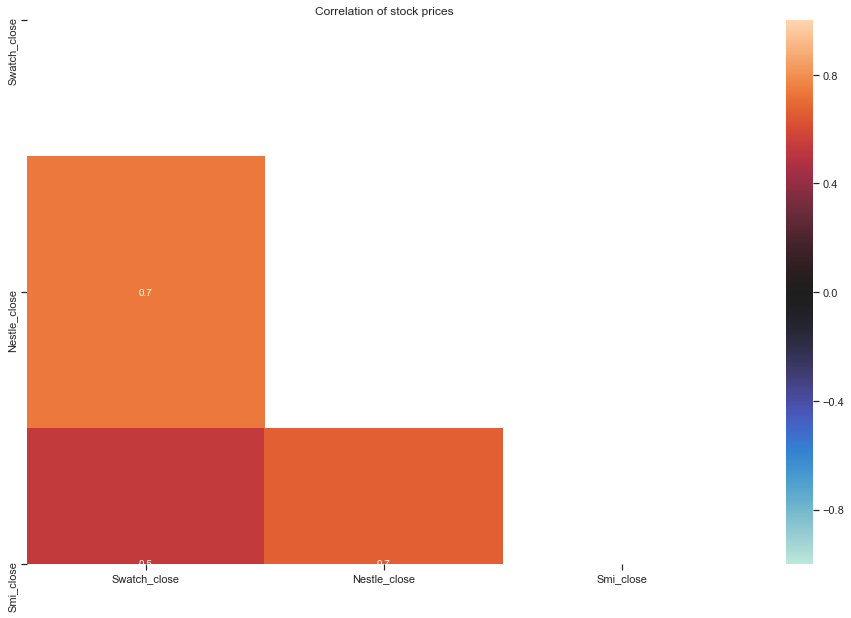

In [167]:
#heatmap / correlation stock
plt.figure(figsize=(16, 10))
matrix = np.triu(stock_close.corr())
heat=sns.heatmap(stock_close.corr(), annot=True,fmt='.1g',vmin=-1, vmax=1, center= 0, mask=matrix)
plt.title('Correlation of stock prices')
plt.savefig(os.path.join(path_fig,'heat_stock.png'))

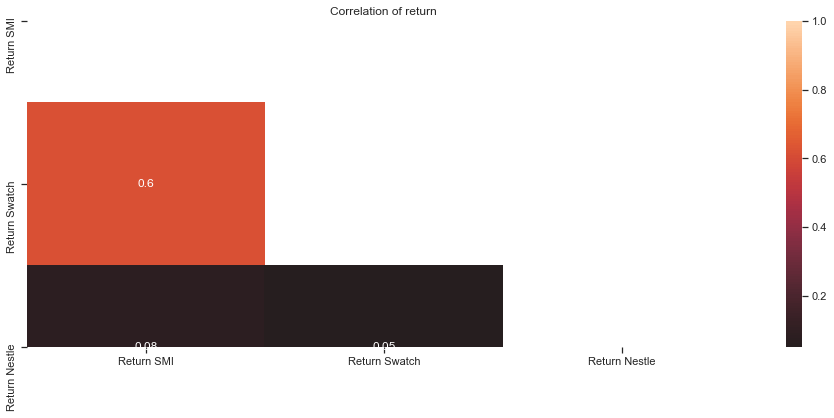

In [55]:
#heatmap / correlation return
plt.figure(figsize=(16, 6))
matrix = np.triu(return_stock.corr())
heat=sns.heatmap(return_stock.corr(), annot=True,fmt='.1g',vmin=-1, vmax=1, center= 0, mask=matrix)
plt.title('Correlation of return')
plt.savefig(os.path.join(path_fig,'heat_returb.png'))

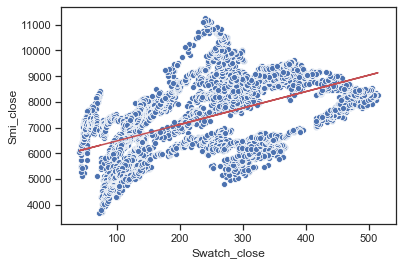

In [51]:
x=df['Swatch_close']
y=df['Smi_close']
m, b = np.polyfit(x, y, 1) ### create reg
plt.plot(x, m*x + b,'r')

scatter_SMI_SWATCH=sns.scatterplot(data=df, x='Swatch_close', y="Smi_close")

plt.savefig(os.path.join(path_fig,'Scatter_SMI_Swatch.png'))

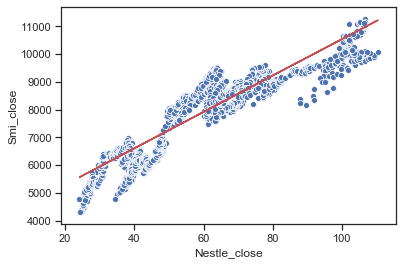

In [250]:
x=df['Nestle_close']
y=df['Smi_close']
m, b = np.polyfit(x, y, 1) ### create reg
plt.plot(x, m*x + b,'r')

scatter_SMI_Nestle=sns.scatterplot(data=df, x='Nestle_close', y="Smi_close")
plt.savefig(os.path.join(path_fig,'Scatter_SMI_Nestle.png'))

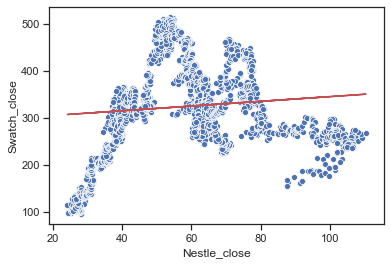

In [251]:
x=df['Nestle_close']
y=df['Swatch_close']
m, b = np.polyfit(x, y, 1) ### create reg
plt.plot(x, m*x + b,'r')

scatter_Nestle_Swatch=sns.scatterplot(data=df, x='Nestle_close', y="Swatch_close")
plt.savefig(os.path.join(path_fig,'Scatter_Nestle_Swatch.png'))

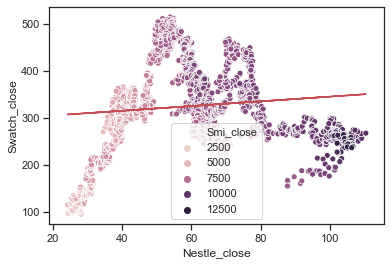

In [252]:
x=df['Nestle_close']
y=df['Swatch_close']
m, b = np.polyfit(x, y, 1) ### create reg
plt.plot(x, m*x + b,'r')

scatter_HUE_Nestle_Swatch=sns.scatterplot(data=df, x='Nestle_close', y="Swatch_close", hue='Smi_close');
plt.savefig(os.path.join(path_fig,'Scatter_HUE_Nestle_Swatch.png'))

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


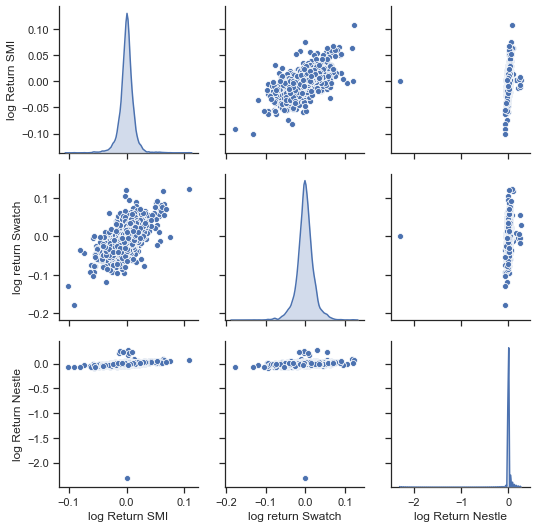

In [177]:
#scatter of return
log_return=df[['log Return SMI','log return Swatch','log Return Nestle']]
pairplot_log_return = sns.pairplot(log_return, diag_kind=('kde'))
pairplot.fig.suptitle("PairPlot  log Return SMI, Swatch & Nestle")
plt.savefig(os.path.join(path_fig,'Pairplot_log_return.png'))

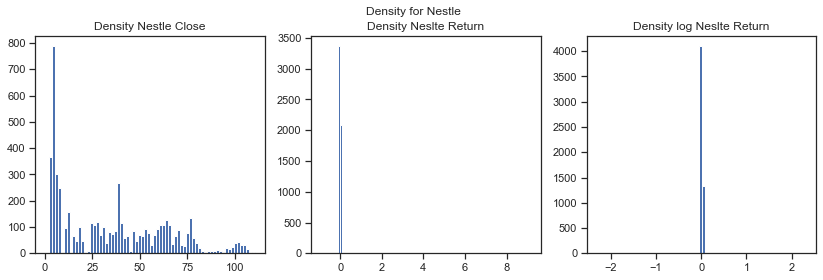

In [169]:
#subplot Return & log return nestle 
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (14,4))
fig.suptitle('Density for Nestle')

ax1.hist(df['Nestle_close'],bins=70)
ax1.set_title("Density Nestle Close")

ax2.hist(df['Return Nestle'], bins=100)
ax2.set_title("Density Neslte Return");

ax3.hist(df['log Return Nestle'], bins=70)
ax3.set_title("Density log Neslte Return")

plt.savefig(os.path.join(path_fig,'Density of Nestle.png'))

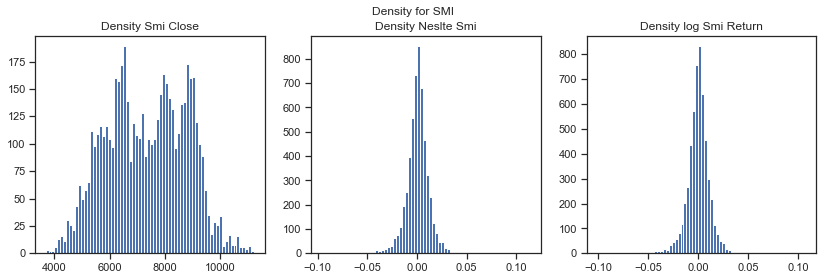

In [166]:
#subplot Return & log return SMI
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (14,4))
fig.suptitle('Density for SMI')

ax1.hist(df['Smi_close'],bins=70)
ax1.set_title("Density Smi Close")

ax2.hist(df['Return SMI'], bins=70)
ax2.set_title("Density Neslte Smi");

ax3.hist(df['log Return SMI'], bins=70)
ax3.set_title("Density log Smi Return")

plt.savefig(os.path.join(path_fig,'Density SMI.png'))

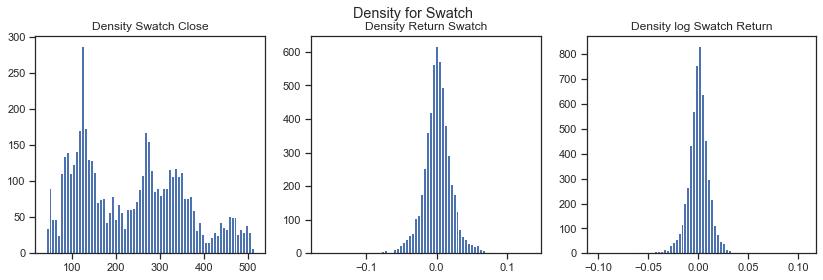

In [63]:
#subplot Return & log return Swatch
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (14,4))
fig.suptitle('Density for Swatch')

ax1.hist(df['Swatch_close'],bins=70)
ax1.set_title("Density Swatch Close")

ax2.hist(df['Return Swatch'], bins=70)
ax2.set_title("Density Return Swatch");

ax3.hist(df['log Return SMI'], bins=70)
ax3.set_title("Density log Swatch Return")

plt.savefig(os.path.join(path_fig,'Density Swatch.png'))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


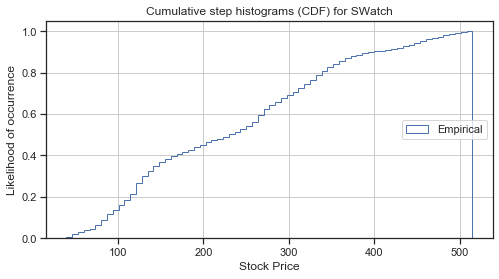

In [64]:
#empirical distribution and the CDF for Swatch stock prices
fig, ax = plt.subplots(figsize=(8, 4))

n_bins = 70

# plot the cumulative histogram
n, bins, patches = ax.hist(df['Swatch_close'], n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the CDF Normal distribution.
mu = 0
sigma = 1
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms (CDF) for SWatch')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Likelihood of occurrence')

plt.savefig(os.path.join(path_fig,'CFD Swatch prices.png'))

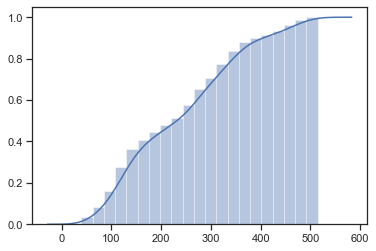

In [118]:

sns.distplot(df['Swatch_close'].values, hist_kws={'cumulative': True, 'density': True}, kde_kws={'cumulative': True})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


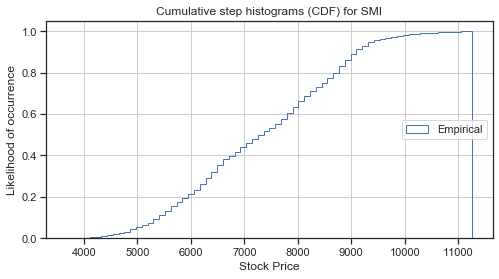

In [115]:
#empirical distribution and the CDF for SMI stock prices
fig, ax = plt.subplots(figsize=(8, 4))

n_bins = 70

# plot the cumulative histogram
n, bins, patches = ax.hist(df['Smi_close'], n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the CDF Normal distribution.
mu = 0
sigma = 1
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms (CDF) for SMI')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Likelihood of occurrence')

plt.savefig(os.path.join(path_fig,'CDF SMI prices.png'))

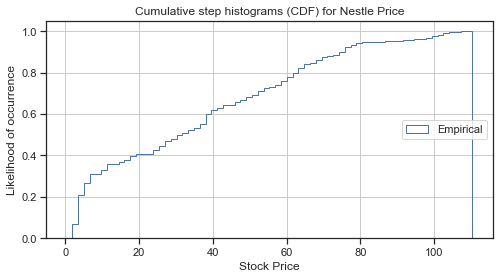

In [66]:
#empirical distribution and the CDF for SMI stock prices
fig, ax = plt.subplots(figsize=(8, 4))

n_bins = 70

# plot the cumulative histogram
n, bins, patches = ax.hist(df['Nestle_close'], n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the CDF Normal distribution.
mu = 0
sigma = 1
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms (CDF) for Nestle Price')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Likelihood of occurrence')

plt.savefig(os.path.join(path_fig,'CDF Nestle price.png'))

In [263]:
#empirical distribution and the CDF of Return

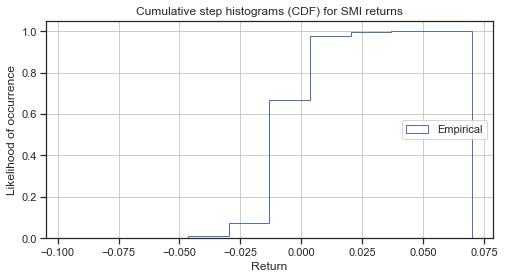

In [264]:
#empirical distribution and the CDF for SMI stock prices
fig, ax = plt.subplots(figsize=(8, 4))

n_bins = 70

# plot the cumulative histogram
n, bins, patches = ax.hist(df['Return SMI'], density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the CDF Normal distribution.
mu = 0
sigma = 1
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms (CDF) for SMI returns')
ax.set_xlabel('Return')
ax.set_ylabel('Likelihood of occurrence')

plt.savefig(os.path.join(path_fig,'CDF return SMI'))

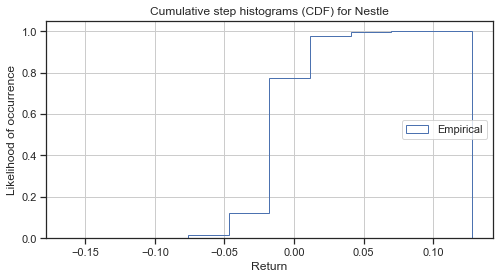

In [266]:
#empirical distribution and the CDF for SMI stock prices
fig, ax = plt.subplots(figsize=(8, 4))

n_bins = 70

# plot the cumulative histogram
n, bins, patches = ax.hist(df['Return Swatch'], density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the CDF Normal distribution.
mu = 0
sigma = 1
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms (CDF) for Nestle')
ax.set_xlabel('Return')
ax.set_ylabel('Likelihood of occurrence')

plt.savefig(os.path.join(path_fig,'CDF return Swatch'))

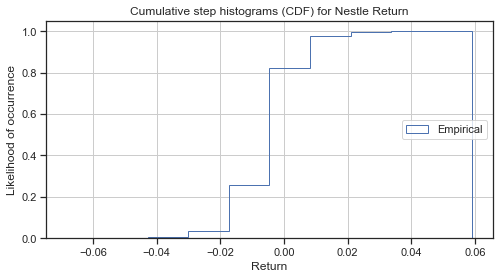

In [267]:
#empirical distribution and the CDF for SMI stock prices
fig, ax = plt.subplots(figsize=(8, 4))

n_bins = 70

# plot the cumulative histogram
n, bins, patches = ax.hist(df['Return Nestle'], density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the CDF Normal distribution.
mu = 0
sigma = 1
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms (CDF) for Nestle Return')
ax.set_xlabel('Return')
ax.set_ylabel('Likelihood of occurrence')

plt.savefig(os.path.join(path_fig,'CDF return Nestle'))

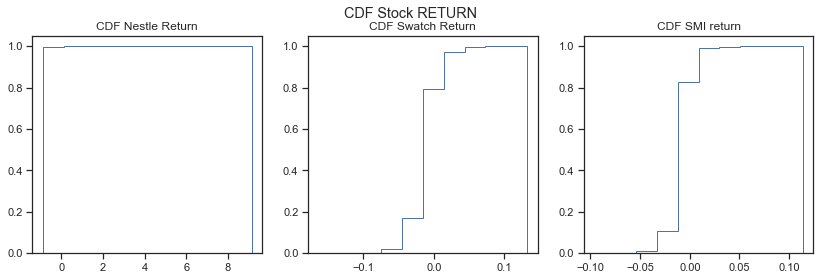

In [67]:
# Subtplot CDF Close
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (14,4))
fig.suptitle('CDF Stock RETURN')

ax1.hist(df['Return Nestle'], density=True, histtype='step',cumulative=True, label='Empirical')
ax1.set_title("CDF Nestle Return")

ax2.hist(df['Return Swatch'], density=True, histtype='step',cumulative=True, label='Empirical')
ax2.set_title("CDF Swatch Return")

ax3.hist(df['Return SMI'], density=True, histtype='step',cumulative=True, label='Empirical')
ax3.set_title("CDF SMI return");

plt.savefig(os.path.join(path_fig,'Subplot CDF 3 stock Return'))

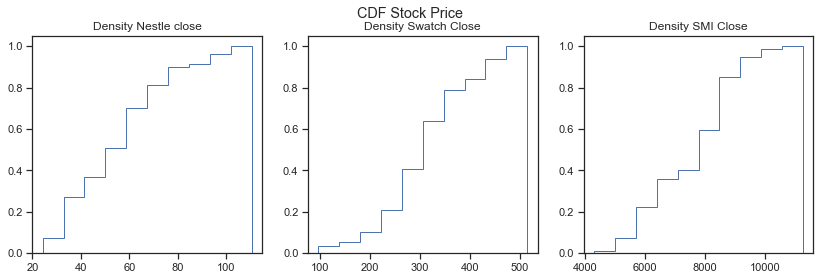

In [269]:
#subplot CDF return
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (14,4))
fig.suptitle('CDF Stock Price')

ax1.hist(df['Nestle_close'], density=True, histtype='step',cumulative=True, label='Empirical')
ax1.set_title("Density Nestle close")

ax2.hist(df['Swatch_close'], density=True, histtype='step',cumulative=True, label='Empirical')
ax2.set_title("Density Swatch Close");

ax3.hist(df['Smi_close'], density=True, histtype='step',cumulative=True, label='Empirical')
ax3.set_title("Density SMI Close");

plt.savefig(os.path.join(path_fig,'CF 3 stock prices'))

In [270]:
df['Date']=pd.to_datetime(df.index)

In [271]:
df = df[['Date','Swatch_close', 'Nestle_close', 'Smi_close', 'Return SMI',
       'Return Swatch', 'Return Nestle', 'log Return SMI', 'log return Swatch',
       'log Return Nestle']]

In [272]:
df.head()

,Date,Swatch_close,Nestle_close,Smi_close,Return SMI,Return Swatch,Return Nestle,log Return SMI,log return Swatch,log Return Nestle
Date,,,,,,,,,,
2009-01-05,2009-01-05,121.958183,29.141609,5756.089844,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,2009-01-06,123.627731,29.141609,5799.310059,0.007509,0.013690,0.000000,0.007481,0.013597,0.000000
2009-01-07,2009-01-07,123.309753,29.169106,5761.689941,-0.006487,-0.002572,0.000944,-0.006508,-0.002575,0.000943
2009-01-08,2009-01-08,117.267487,28.907934,5751.069824,-0.001843,-0.049001,-0.008954,-0.001845,-0.050242,-0.008994
2009-01-09,2009-01-09,113.689819,27.753267,5697.240234,-0.009360,-0.030509,-0.039943,-0.009404,-0.030984,-0.040763


Index(['Swatch_close', 'Nestle_close', 'Smi_close', 'Return SMI',
       'Return Swatch', 'Return Nestle', 'log Return SMI', 'log return Swatch',
       'log Return Nestle', 'Date'],
      dtype='object')

In [71]:
#new df for yearly data based on mean 
df_y = df.resample('Y').mean()

In [72]:

df_y.head()

,Swatch_close,Nestle_close,Smi_close,Return SMI,Return Swatch,Return Nestle,log Return SMI,log return Swatch,log Return Nestle
Date,,,,,,,,,
1998-12-31,51.762906,3.404251,6866.769235,-0.001003,-0.002494,-0.000915,-0.001261,-0.002901,-0.001194
1999-12-31,71.414476,3.364878,7130.881822,0.000281,0.003692,-0.000011,0.000220,0.003460,-0.000098
2000-12-31,149.203695,3.917275,7706.406359,0.000330,0.000965,0.033745,0.000286,0.000646,0.001028
2001-12-31,122.043806,4.214639,6944.329307,-0.000845,-0.000741,-0.000142,-0.000952,-0.001159,-0.000263
2002-12-31,99.036921,4.648632,5720.443068,-0.001124,-0.000548,0.000199,-0.001290,-0.001003,-0.000021


In [73]:
#export describe table
describe_daily=df.describe()
describe_yearly=df_y.describe()
describe_daily.to_excel(os.path.join(path_table,'Describe_daily.xlsx'))
describe_yearly.to_excel(os.path.join(path_table,'Describe_yearly.xlsx'))

In [74]:
df.describe()

,Swatch_close,Nestle_close,Smi_close,Return SMI,Return Swatch,Return Nestle,log Return SMI,log return Swatch,log Return Nestle
count,5461.000000,5461.000000,5461.000000,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000
mean,234.651272,35.415034,7348.138884,0.000096,0.000401,0.002204,0.000024,0.000179,0.000585
std,120.392554,28.658745,1435.629902,0.012000,0.021053,0.125158,0.012015,0.021074,0.046626
min,39.692879,0.382786,3675.399902,-0.096374,-0.163457,-0.900000,-0.101339,-0.178478,-2.302585
25%,125.313263,5.868557,6236.799805,-0.005490,-0.010516,-0.005664,-0.005505,-0.010572,-0.005680
50%,234.418228,31.987049,7373.399902,0.000493,0.000000,0.000000,0.000493,0.000000,0.000000
75%,325.848907,59.190041,8554.509766,0.005997,0.011178,0.006590,0.005979,0.011116,0.006568
max,514.693665,110.331757,11263.009766,0.113910,0.132353,9.133536,0.107876,0.124298,2.315850


In [131]:
df_na = df.dropna()
df_na

,Swatch_close,Nestle_close,Smi_close,Return SMI,Return Swatch,Return Nestle,log Return SMI,log return Swatch,log Return Nestle
Date,,,,,,,,,
1998-07-20,73.005150,4.123868,8400.799805,0.013586,0.000000,0.010192,0.013494,0.000000,0.010141
1998-07-21,72.330849,4.158342,8412.000000,0.001333,-0.009236,0.008360,0.001332,-0.009279,0.008325
1998-07-22,70.551277,4.084637,8340.700195,-0.008476,-0.024603,-0.017725,-0.008512,-0.024911,-0.017884
1998-07-23,68.895172,3.937229,8229.200195,-0.013368,-0.023474,-0.036088,-0.013458,-0.023754,-0.036756
1998-07-24,70.122139,3.799332,8205.700195,-0.002856,0.017809,-0.035024,-0.002860,0.017652,-0.035652
...,...,...,...,...,...,...,...,...,...
2020-04-03,176.530884,99.766418,9242.440430,-0.003076,-0.030569,0.012663,-0.003081,-0.031046,0.012584
2020-04-06,189.454865,101.325882,9462.339844,0.023792,0.073211,0.015631,0.023514,0.070655,0.015510
2020-04-07,196.134674,101.267403,9514.599609,0.005523,0.035258,-0.000577,0.005508,0.034651,-0.000577


In [129]:
describe_yearly

,Swatch_close,Nestle_close,Smi_close,Return SMI,Return Swatch,Return Nestle,log Return SMI,log return Swatch,log Return Nestle
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,230.348971,36.771905,7429.577481,0.000024,0.000202,0.002053,-0.000059,-0.000033,0.000515
std,120.245503,31.095252,1445.525430,0.000759,0.001744,0.006950,0.000824,0.001825,0.000761
min,51.762906,3.364878,4836.031608,-0.001456,-0.003718,-0.000915,-0.001702,-0.004223,-0.001194
25%,128.508374,6.078254,6390.940246,-0.000312,-0.000699,0.000115,-0.000374,-0.001041,0.000012
50%,221.643795,30.330047,7130.881822,0.000177,0.000620,0.000531,0.000145,0.000495,0.000491
75%,327.528480,59.886449,8739.983144,0.000600,0.001230,0.001130,0.000571,0.001047,0.000982
max,469.765725,100.643895,10112.864355,0.001147,0.003692,0.033745,0.001129,0.003460,0.002197


In [170]:
from scipy.stats import describe
df_y_desc = describe(df_na, axis=0)
df2 = pd.DataFrame([df_y_desc.kurtosis, df_y_desc.skewness], columns=df_na.columns,index=['Kurtosis', 'Skewness'])
df2

,Swatch_close,Nestle_close,Smi_close,Return SMI,Return Swatch,Return Nestle,log Return SMI,log return Swatch,log Return Nestle
Kurtosis,-0.893335,-0.735046,-0.813243,7.246905,3.591022,5188.725487,7.198843,3.813641,2202.647303
Skewness,0.358412,0.546403,-0.013294,-0.117368,-0.011207,71.089120,-0.282349,-0.190895,0.506120


In [171]:
def statDescriptive(data):
    data = data.dropna()
    data_describ = data.describe()
    
    data_stat = describe(data, axis=0)
    df2 = pd.DataFrame([data_stat.kurtosis, data_stat.skewness], columns=data.columns,index=['Kurtosis', 'Skewness'])
    
    data_describ = data_describ.append(df2)
    
    return data_describ

In [172]:
statDescriptive(df)

,Swatch_close,Nestle_close,Smi_close,Return SMI,Return Swatch,Return Nestle,log Return SMI,log return Swatch,log Return Nestle
count,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000
mean,234.680877,35.420773,7347.966712,0.000096,0.000401,0.002204,0.000024,0.000179,0.000585
std,120.383698,28.658232,1435.705002,0.012000,0.021053,0.125158,0.012015,0.021074,0.046626
min,39.692879,0.382786,3675.399902,-0.096374,-0.163457,-0.900000,-0.101339,-0.178478,-2.302585
25%,125.325033,5.868557,6236.774902,-0.005490,-0.010516,-0.005664,-0.005505,-0.010572,-0.005680
50%,234.535027,32.007666,7373.349854,0.000493,0.000000,0.000000,0.000493,0.000000,0.000000
75%,325.851822,59.190041,8554.512207,0.005997,0.011178,0.006590,0.005979,0.011116,0.006568
max,514.693665,110.331757,11263.009766,0.113910,0.132353,9.133536,0.107876,0.124298,2.315850
Kurtosis,-0.893335,-0.735046,-0.813243,7.246905,3.591022,5188.725487,7.198843,3.813641,2202.647303
Skewness,0.358412,0.546403,-0.013294,-0.117368,-0.011207,71.089120,-0.282349,-0.190895,0.506120


In [178]:
df_drop = df.drop(df[df["Return Nestle"] ==  df["Return Nestle"].max()].index)
df_drop = df_drop.drop(df_drop[df_drop["Return Nestle"] ==  df_drop["Return Nestle"].min()].index)

In [179]:
statDescriptive(df_drop)

,Swatch_close,Nestle_close,Smi_close,Return SMI,Return Swatch,Return Nestle,log Return SMI,log return Swatch,log Return Nestle
count,5458.000000,5458.000000,5458.000000,5458.000000,5458.000000,5458.000000,5458.000000,5458.000000,5458.000000
mean,234.711457,35.432971,7347.801877,0.000094,0.000399,0.000696,0.000022,0.000177,0.000583
std,120.395151,28.656375,1435.941995,0.012002,0.021056,0.015465,0.012017,0.021077,0.014846
min,39.692879,2.785305,3675.399902,-0.096374,-0.163457,-0.076672,-0.101339,-0.178478,-0.079771
25%,125.317186,5.878037,6236.725098,-0.005495,-0.010534,-0.005661,-0.005510,-0.010590,-0.005677
50%,234.694489,32.036875,7372.699951,0.000493,0.000000,0.000000,0.000493,0.000000,0.000000
75%,325.857651,59.190041,8554.517090,0.005996,0.011174,0.006589,0.005978,0.011112,0.006567
max,514.693665,110.331757,11263.009766,0.113910,0.132353,0.306075,0.107876,0.124298,0.267026
Kurtosis,-0.893814,-0.735238,-0.813895,7.246204,3.589585,112.228869,7.198029,3.812087,81.158532
Skewness,0.357801,0.546012,-0.012960,-0.117015,-0.010910,6.307068,-0.282001,-0.190579,4.847680


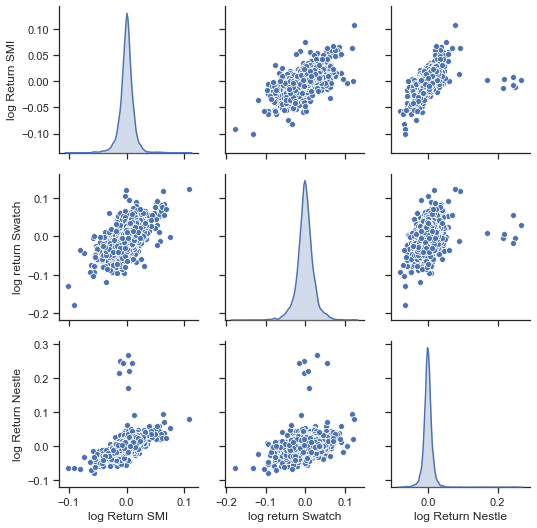

In [180]:
#scatter of return
log_return=df_drop[['log Return SMI','log return Swatch','log Return Nestle']]
pairplot_log_return = sns.pairplot(log_return, diag_kind=('kde'))
pairplot.fig.suptitle("PairPlot  log Return SMI, Swatch & Nestle")
plt.savefig(os.path.join(path_fig,'Pairplot_log_return.png'))

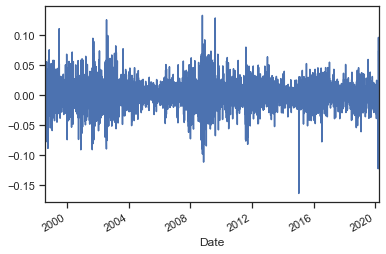

In [183]:
df_drop['Return Swatch'].plot()

In [138]:
descr_daily = df.describe()
descr_daily = descr_daily.append(df2)
descr_daily

,Swatch_close,Nestle_close,Smi_close,Return SMI,Return Swatch,Return Nestle,log Return SMI,log return Swatch,log Return Nestle
count,5461.000000,5461.000000,5461.000000,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000
mean,234.651272,35.415034,7348.138884,0.000096,0.000401,0.002204,0.000024,0.000179,0.000585
std,120.392554,28.658745,1435.629902,0.012000,0.021053,0.125158,0.012015,0.021074,0.046626
min,39.692879,0.382786,3675.399902,-0.096374,-0.163457,-0.900000,-0.101339,-0.178478,-2.302585
25%,125.313263,5.868557,6236.799805,-0.005490,-0.010516,-0.005664,-0.005505,-0.010572,-0.005680
50%,234.418228,31.987049,7373.399902,0.000493,0.000000,0.000000,0.000493,0.000000,0.000000
75%,325.848907,59.190041,8554.509766,0.005997,0.011178,0.006590,0.005979,0.011116,0.006568
max,514.693665,110.331757,11263.009766,0.113910,0.132353,9.133536,0.107876,0.124298,2.315850
Kurtosis,-0.893335,-0.735046,-0.813243,7.246905,3.591022,5188.725487,7.198843,3.813641,2202.647303
Skewness,0.358412,0.546403,-0.013294,-0.117368,-0.011207,71.089120,-0.282349,-0.190895,0.506120


In [276]:
df.columns

Index(['Date', 'Swatch_close', 'Nestle_close', 'Smi_close', 'Return SMI',
       'Return Swatch', 'Return Nestle', 'log Return SMI', 'log return Swatch',
       'log Return Nestle'],
      dtype='object')

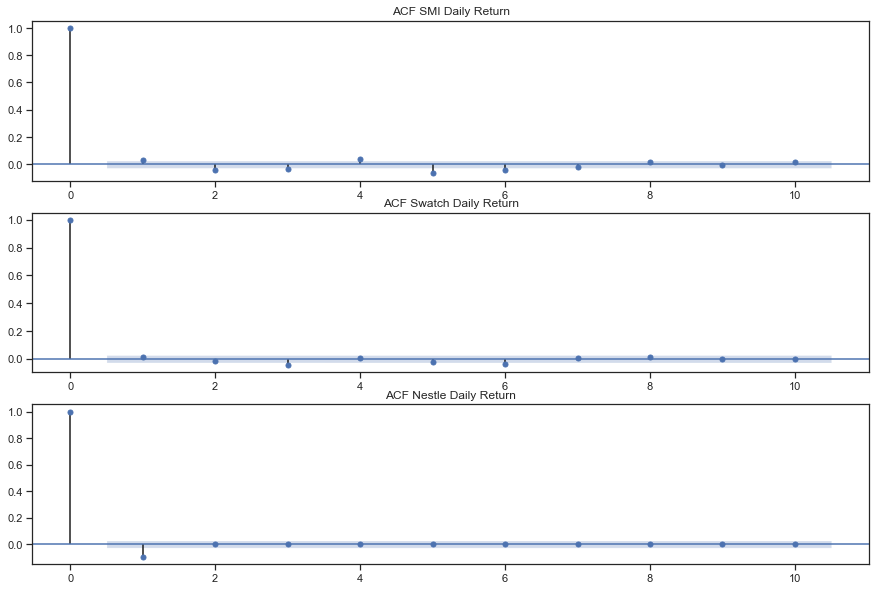

In [76]:
# subtplot acf daily
fig, axes = plt.subplots(3,1,figsize=(15,10))
fig.title='ACF Daily Return'

fig_first = plot_acf(df['Return SMI'].dropna(),lags= 10, ax=axes[0],title='ACF SMI Daily Return')
fig_second = plot_acf(df['Return Swatch'].dropna(),lags= 10, ax=axes[1],title='ACF Swatch Daily Return')
fig_third = plot_acf(df['Return Nestle'].dropna(),lags= 10, ax=axes[2],title='ACF Nestle Daily Return')

plt.savefig(os.path.join(path_fig,'ACF 3 daily Return'))

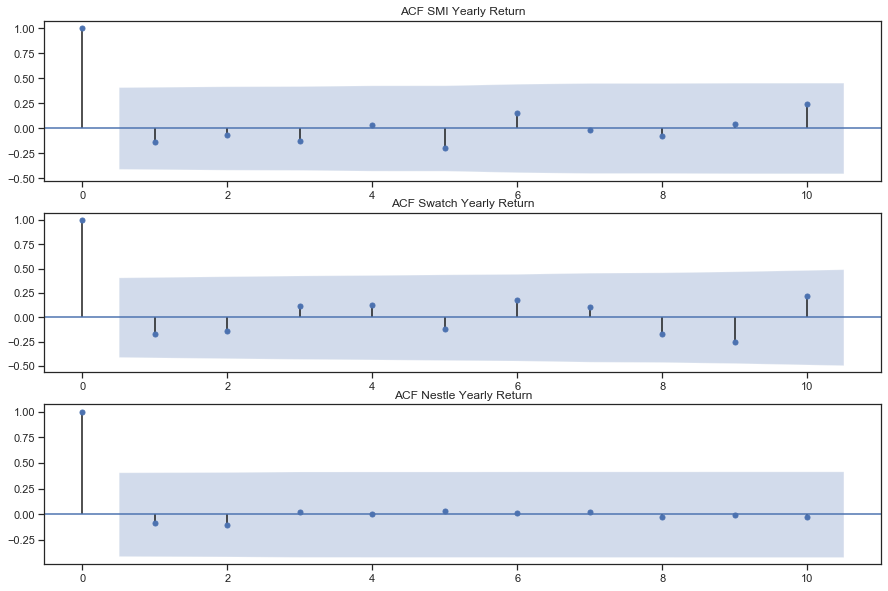

In [77]:
# subtplot acf yearly 
fig, axes = plt.subplots(3,1,figsize=(15,10))
fig.title='ACF Daily Return'

fig_first = plot_acf(df_y['Return SMI'].dropna(),lags= 10, ax=axes[0],title='ACF SMI Yearly Return')
fig_second = plot_acf(df_y['Return Swatch'].dropna(),lags= 10, ax=axes[1],title='ACF Swatch Yearly Return')
fig_third = plot_acf(df_y['Return Nestle'].dropna(),lags= 10,ax=axes[2],title='ACF Nestle Yearly Return')

plt.savefig(os.path.join(path_fig,'ACF 3 Yearly Return'))

In [106]:
#2d) Rolling correlation for  daily and yearly Price Nestle & Swatch (10)
rolling_corr_daily=df['Swatch_close'].rolling(7).corr(df['Nestle_close'])
rolling_corr_yearly= df_y['Swatch_close'].rolling(10).corr(df_y['Nestle_close'])

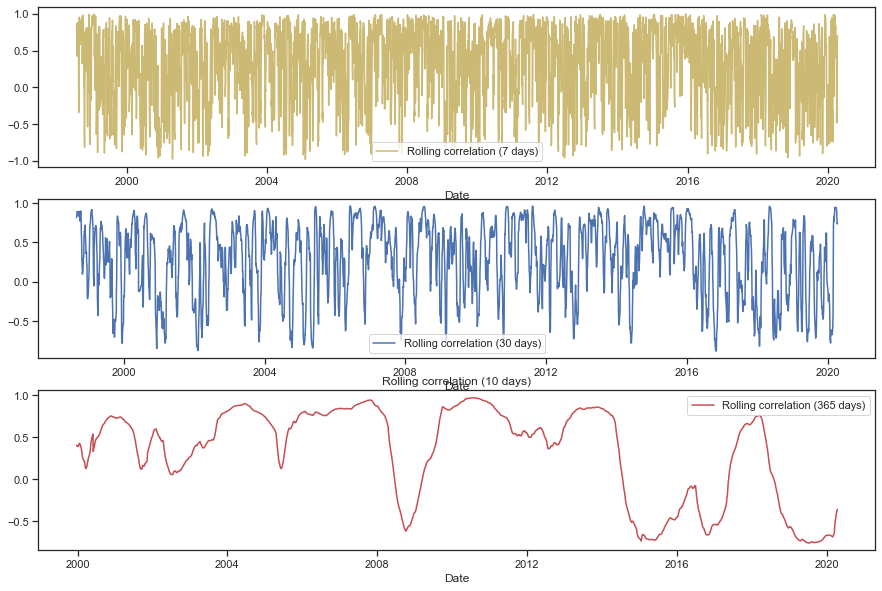

In [113]:
#daily rolling corr windows of 10
fig, axes = plt.subplots(3,1,figsize=(15,10))
sns.lineplot(df.index,rolling_corr_daily, ax=axes[0],label='Rolling correlation (7 days)',c='y')
sns.lineplot(df.index,df['Swatch_close'].rolling(30).corr(df['Nestle_close']), ax=axes[1],label='Rolling correlation (30 days)',c='b')
sns.lineplot(df.index,df['Swatch_close'].rolling(365).corr(df['Nestle_close']), ax=axes[2],label='Rolling correlation (365 days)',c='r')
plt.title('Rolling correlation (10 days)')
plt.legend()


/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


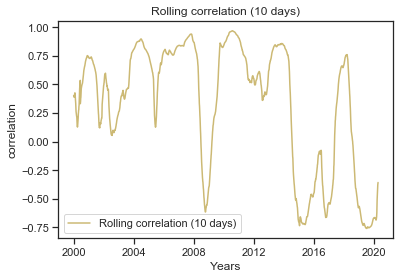

In [98]:
#daily rolling corr windows of 10
sns.lineplot(df.index,df['Swatch_close'].rolling(365).corr(df['Nestle_close']),label='Rolling correlation (10 days)',c='y')
plt.title('Rolling correlation (10 days)')
plt.xlabel('Years')
plt.ylabel('correlation')
plt.legend()

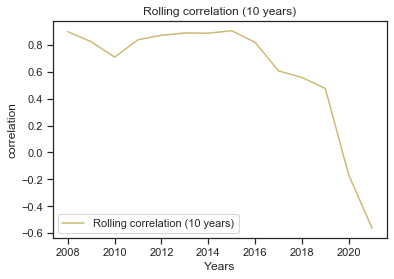

In [81]:
#yearly rolling corr windows of 10years
sns.lineplot(df_y.index,rolling_corr_yearly,label='Rolling correlation (10 years)',c='y')
plt.title('Rolling correlation (10 years)')
plt.xlabel('Years')
plt.ylabel('correlation')
plt.legend()

In [95]:
reg_data = df[['Return Swatch','Return Nestle','Return SMI']]
reg_data['Return SMI t-1'] = reg_data['Return SMI'].shift(1)
reg_data['Return Swatch t-1'] = df['Return Swatch'].shift(1)
reg_data['Return Nestle t-1'] = df['Return Nestle'].shift(1)
reg_data = reg_data.dropna()
reg_data

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,Return Swatch,Return Nestle,Return SMI,Return SMI t-1,Return Swatch t-1,Return Nestle t-1
Date,,,,,,
1998-07-21,-0.009236,0.008360,0.001333,0.013586,0.000000,0.010192
1998-07-22,-0.024603,-0.017725,-0.008476,0.001333,-0.009236,0.008360
1998-07-23,-0.023474,-0.036088,-0.013368,-0.008476,-0.024603,-0.017725
1998-07-24,0.017809,-0.035024,-0.002856,-0.013368,-0.023474,-0.036088
1998-07-27,-0.015754,-0.036921,-0.025226,-0.002856,0.017809,-0.035024
...,...,...,...,...,...,...
2020-04-03,-0.030569,0.012663,-0.003076,0.011122,0.013743,0.012420
2020-04-06,0.073211,0.015631,0.023792,-0.003076,-0.030569,0.012663
2020-04-07,0.035258,-0.000577,0.005523,0.023792,0.073211,0.015631


In [151]:
import statsmodels.api as sm
#2e) regress Nestle returns on the contemporaneous and lagged Index returns

y= reg_data['Return Nestle']

x= reg_data[['Return SMI','Return SMI t-1']]

x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())
print(results.summary().as_latex())

                            OLS Regression Results                            
Dep. Variable:          Return Nestle   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     19.35
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           4.24e-09
Time:                        18:35:24   Log-Likelihood:                 3618.1
No. Observations:                5459   AIC:                            -7230.
Df Residuals:                    5456   BIC:                            -7210.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0021      0.002      1.

In [150]:
y= reg_data['Return Swatch']

x= reg_data[['Return SMI','Return SMI t-1']]

x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())
print(results.summary().as_latex())

                            OLS Regression Results                            
Dep. Variable:          Return Swatch   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     1698.
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:32:52   Log-Likelihood:                 14651.
No. Observations:                5459   AIC:                        -2.930e+04
Df Residuals:                    5456   BIC:                        -2.928e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0003      0.000      1.